# Download Dataset from Kaggle

## Install Kaggle

In [1]:
# Install Kaggle
! pip install -q kaggle

## Get Kaggle token file

In [ ]:
# Upload kaggle token
from google.colab import files

files.upload()

## Create folder for kaggle and download dataset

* Create kaggle folder
* Get access kaggle
* Unzip file

In [3]:
# Create folder
! mkdir ~/.kaggle

In [4]:
# Copy token into Kaggle folder
! cp kaggle.json ~/.kaggle/

In [5]:
# Get Authorize
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Plot working directory
!pwd

/content


In [7]:
# List passiable
! kaggle datasets list

ref                                                    title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/mcdonalds-india-menu-nutrition-facts    McDonald's India : Menu Nutrition Dataset          5KB  2022-07-28 17:08:52           3397        141  0.9411765        
iamsouravbanerjee/house-rent-prediction-dataset        House Rent Prediction Dataset                     82KB  2022-08-20 13:49:03           3479        125  1.0              
arianazmoudeh/airbnbopendata                           Airbnb Open Data                                  10MB  2022-08-01 15:58:10           2205         78  0.9705882        
ericsims/world-cheese-awards-worlds-cheesiest-dataset  World Cheese Awards (World's Cheesiest Dataset)   49KB  2022-08-1

In [8]:
# Download the dataset
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 92% 145M/158M [00:02<00:00, 55.0MB/s]
100% 158M/158M [00:02<00:00, 56.3MB/s]


In [9]:
# Take out dataset from zip
!unzip /content/covid19-image-dataset.zip

Archive:  /content/covid19-image-dataset.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
  inflatin

# Check num of train data

In [10]:
import numpy as np
import pandas as pd

import os 
covid_19_images = len(os.listdir(("/content/Covid19-dataset")))

print(covid_19_images)

2


# Get classnames progmativally

In [11]:
import pathlib

data_dir = pathlib.Path("/content/Covid19-dataset/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a lisf of class names from the subdirection

print(class_names)

['Covid' 'Normal' 'Viral Pneumonia']


# Visualize the images

Image name : COVID-00007.jpg
Image shape : (1703, 1690)


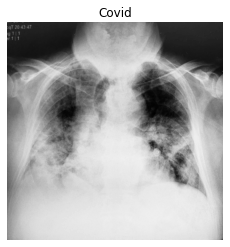

In [12]:
# visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img,cmap="gray")
  plt.title(target_class)
  plt.axis("off");
  print(f"Image name : {random_image[0]}")
  print(f"Image shape : {img.shape}") # show the shape of image

  return img

# View random image from training dataset
img = view_random_image(target_dir="/content/Covid19-dataset/train/", target_class="Covid")


# Visualize Multi class three images

In [13]:
# plot three images at same time with different classes  (num of class 3)
def view_three_images(target_dir, class_names):
    """
    Randomly selects and displays 3 random images from `target_class` folder in `target_dir` folder.
    
    Requires target_dir to be in format:
        target_dir
                 |target_class_1
                 |target_class_2
                 |...
                 
    """
    target_images =[]
    for class_name in class_names: 
      target_path = target_dir+class_name
      
      file_names = os.listdir(target_path)
      target_images.append(random.sample(file_names, 1))
      
    # Plot images
    plt.figure(figsize=(15, 6))
    for i, img in enumerate(target_images):
        
        target_path = target_dir+class_names[i]
        img_path = str(target_path) + "/" + img[0]
        plt.subplot(1, 3, i+1)
        plt.imshow(mpimg.imread(img_path),cmap="gray")
        plt.title(class_names[i])
        plt.axis("off")

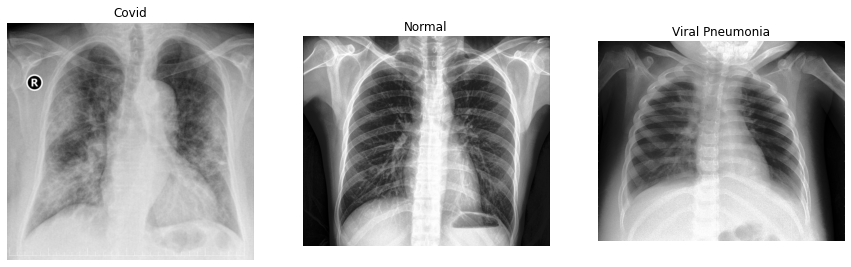

In [ ]:
# Plot images
view_three_images(target_dir="/content/Covid19-dataset/train/", 
                  class_names=class_names)

## Check out image shape

Image name : 074.jpeg
Image shape : (2085, 1970, 3)


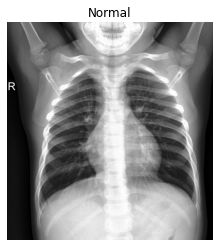

In [ ]:
# View random image from training dataset
img = view_random_image(target_dir="/content/Covid19-dataset/train/", target_class="Normal")

The image shape is huge and has 3 channels but we don't need 3 color channels because it only uses black and white. So I'm going to upload grayscale images and reshape them (516,516) since they're too big.

## Check out class names

In [ ]:
print(class_names)

['Covid' 'Normal' 'Viral Pneumonia']


#2. Load and Preprocess the data (prepare it for a model)

In [14]:
# Setup the train and test directories
train_dir = r"/content/Covid19-dataset/train/"
test_dir = r"/content/Covid19-dataset/test/"

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE =(516,516)
# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               color_mode='grayscale',
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size =IMG_SIZE,
                                             batch_size = 32,
                                             color_mode='grayscale',
                                             class_mode = "categorical")

len(test_data),test_data,len(train_data)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


(3, <keras.preprocessing.image.DirectoryIterator at 0x7f7db3cf5610>, 8)

In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.01960784],
          [0.01960784],
          [0.01960784],
          ...,
          [0.00392157],
          [0.00392157],
          [0.00392157]],
 
         [[0.04313726],
          [0.02352941],
          [0.02745098],
          ...,
          [0.00392157],
          [0.00392157],
          [0.00392157]],
 
         [[0.02745098],
          [0.02745098],
          [0.02352941],
          ...,
          [0.00392157],
          [0.00392157],
          [0.00392157]],
 
         ...,
 
         [[0.0509804 ],
          [0.07058824],
          [0.07843138],
          ...,
          [0.00392157],
          [0.00392157],
          [0.00392157]],
 
         [[0.04313726],
          [0.0627451 ],
          [0.07843138],
          ...,
          [0.00392157],
          [0.00392157],
          [0.00392157]],
 
         [[0.04313726],
          [0.05490196],
          [0.05882353],
          ...,
          [0.00392157],
          [0.00392157],
          [0.00392157]]],
 
 
        [

# 3. Create a model (start with baseline)

I will use baseline that model from [CNN EXPLAINER](https://poloclub.github.io/cnn-explainer/) website.

You can choice diffirent baseline model yourself.

That for 10 class and shape is (64,64,3) into this page.

However, it is recommended to choose a small model to develop initially.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = Sequential([
    Conv2D(10,3, input_shape = (516,516,1)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation ="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(3,activation = "softmax") # changed to have 3 output neurons and user softmmax activation function
])


# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, # now 3 different class
                        steps_per_epoch = len(train_data),
                        epochs=10,
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data, # now 3 different class
                        steps_per_epoch = len(train_data),
                        epochs=8,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/8
8/8 [==============================] - 14s 2s/step - loss: 1.0750 - accuracy: 0.4701 - val_loss: 1.0003 - val_accuracy: 0.4091
Epoch 2/8
8/8 [==============================] - 13s 2s/step - loss: 0.7241 - accuracy: 0.7251 - val_loss: 0.6155 - val_accuracy: 0.8030
Epoch 3/8
8/8 [==============================] - 13s 2s/step - loss: 0.2944 - accuracy: 0.8964 - val_loss: 0.4919 - val_accuracy: 0.7273
Epoch 4/8
8/8 [==============================] - 13s 2s/step - loss: 0.2057 - accuracy: 0.9243 - val_loss: 0.3128 - val_accuracy: 0.8636
Epoch 5/8
8/8 [==============================] - 13s 2s/step - loss: 0.1468 - accuracy: 0.9562 - val_loss: 0.3286 - val_accuracy: 0.9091
Epoch 6/8
8/8 [==============================] - 13s 2s/step - loss: 0.0728 - accuracy: 0.9641 - val_loss: 0.2704 - val_accuracy: 0.8939
Epoch 7/8
8/8 [==============================] - 13s 2s/step - loss: 0.0256 - accuracy: 0.9960 - val_loss: 0.2349 - val_accuracy: 0.9242
Epoch 8/8
8/8 [==========================

## Evaluate custom model

In [19]:
model_1.evaluate(test_data)

3/3 [==============================] - 12s 132ms/step - loss: 0.2178 - accuracy: 0.9545


[0.21781803667545319, 0.9545454382896423]

Custom model is prety good but validation loss is not decreasing enough. So we can improve more.

## Custom Model Save

We can save for use later.

In [ ]:
model_1.save("custom_model_weight_v2/model_1_HDF5_format.h5")

### Zip and Download

In [ ]:
# zip the file
!zip -r /content/custom_model_weight_v2.zip /content/custom_model_weight_v2

updating: content/custom_model_weight_v2/ (stored 0%)
updating: content/custom_model_weight_v2/model_1_HDF5_format.h5 (deflated 8%)


In [ ]:
from google.colab import files
files.download("/content/custom_model_weight_v2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
!unzip /content/custom_model_weight_v2.zip

Archive:  /content/custom_model_weight_v2.zip
   creating: content/custom_model_weight_v2/
  inflating: content/custom_model_weight_v2/model_1_HDF5_format.h5  


In [18]:
import tensorflow as tf
model_1 = tf.keras.models.load_model('/content/content/custom_model_weight_v2/model_1_HDF5_format.h5')

## Visualize model_1 history for how to training result.

We will check out training history (loss and accuracy) on line graph. 

In [69]:
# Let's create a function to plot our loss curves...
# Tidbit : you could put a function like this into a script called "hepler.py" and import helper

import matplotlib.pyplot as plt

# plot validation and training curves
def plot_loss_curves(history):
  """
  Return seperate loss curves for traning and validation metrics

  Args:
    history : TensorFlow History object.

  Returns:
    plots of training/validation loss and acuracy metrics 
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss 
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs,val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

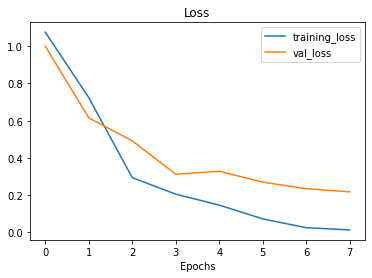

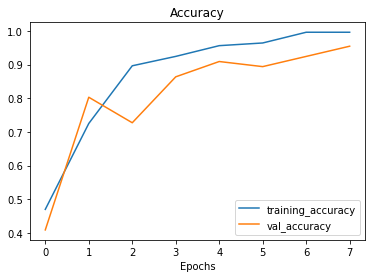

In [ ]:
# Check out the model's loss curves on the 3 classes
plot_loss_curves(history_1)

# Transfer Learning

## Setting up callbacks (things to run whilst our model trains)

Callbacks are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks:

* Tracking experiments with the TensorBoard callback
* Model checkpoint with ModelCheckpoint callback
* Stoping a model from training (before it trains too long and overfits) with the EarlyStopping callback


In [35]:
# Create TensorBoard callback (functionized because wwe need to create a new one for each model)
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/"+ experiment_name +"/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to {log_dir}")
  
  return tensorboard_callback

## Creating models using Tensorflow hub

In [53]:
# Let's compare the following two models

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

### Augmented Train data training

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r"/content/Covid19-dataset/train/"
IMG_SIZE =(224,224)
# Rescale
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                   rotation_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip =True)

test_datagen_rgb = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               seed =42,
                                               batch_size=32,
                                                
                                               class_mode="categorical")


test_data_rgb = test_datagen_rgb.flow_from_directory(test_dir,
                                             target_size =IMG_SIZE,
                                             batch_size = 32,
                                            
                                             class_mode = "categorical")

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [51]:
# Import dependecies

import tensorflow_hub as hub
from tensorflow.keras import layers

In [52]:
# Let's make a create model() function to create a model from URL

def create_model(model_url, num_classes=10):
  """
    Takes a Tensorflow Hub URL and creates a Keras Sequential model with it

    Args:
      model_url (str) : A TensorFlow Hub feature extraction URL
      num_classes (int) :  NUmber of output neurons in the output layer, 
        should be equal to number of  target classes default 10.

    Returns:
      An uncompiled Keras Sequential model with model_url as feature extractor 
      layer and Dense output layer with num_classes output neurons.

  """
  # Download the pretrained model and save it as  a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False, # Freeze the already learned patterns
                                           name = "feature_extraction_layer",
                                           input_shape = IMG_SIZE +(3,))
  
  # Create our own model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(256,activation="relu"),
      layers.Dropout(0.5),
      
  
      layers.Dense(num_classes, activation ="softmax", name = "output_layer")
  ])

  return model

## Creating and testing ResNet Tensorflow Hub Feature Extraction model

In [54]:
# Set random seed
tf.random.set_seed(42)

# Create Resnet model
resnet_model = create_model(model_url=resnet_url,
                            num_classes= train_data.num_classes)



In [55]:
# Compile our resnet model
resnet_model.compile(loss = "categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"])


In [ ]:
# Let's fit our Resnet model to the data (3 percent of 3 classes) # 5x9 15x1

resnet_history = resnet_model.fit(train_data_augmented,
                 epochs = 10,# total number of epochs 76 epochs
                 steps_per_epoch = len(train_data_augmented),
                 validation_data = test_data_rgb,
                 validation_steps = len(test_data_rgb),
                 callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet50V2")])


## Model Evaluate

**Note:** I interrupt the train because the model is overfitting that result.So i clean training process visualize.

In [75]:
# Review the model on train set
resnet_model.evaluate(train_data_augmented)

8/8 [==============================] - 11s 1s/step - loss: 0.0132 - accuracy: 1.0000


[0.013179678469896317, 1.0]

In [76]:
# Review the model on test set
resnet_model.evaluate(test_data_rgb)

3/3 [==============================] - 1s 324ms/step - loss: 0.2173 - accuracy: 0.9394


[0.2173057496547699, 0.939393937587738]

## Save the check point (optional)


In [80]:
# Save the model
resnet_model.save("resnet_model/resnet_model_saveModel_format")

### Download Model

In [81]:
# Zip the model
!zip -r /content/resnet_model/resnet_model_saveModel_format.zip /content/resnet_model/resnet_model_saveModel_format

updating: content/resnet_model/resnet_model_saveModel_format/ (stored 0%)
updating: content/resnet_model/resnet_model_saveModel_format/variables/ (stored 0%)
updating: content/resnet_model/resnet_model_saveModel_format/variables/variables.data-00000-of-00001 (deflated 7%)
updating: content/resnet_model/resnet_model_saveModel_format/variables/variables.index (deflated 80%)
updating: content/resnet_model/resnet_model_saveModel_format/keras_metadata.pb (deflated 85%)
updating: content/resnet_model/resnet_model_saveModel_format/assets/ (stored 0%)
updating: content/resnet_model/resnet_model_saveModel_format/saved_model.pb (deflated 93%)


In [82]:
# Download the model
from google.colab import files
files.download("/content/resnet_model/resnet_model_saveModel_format.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plot ResNet model loss and accuracy

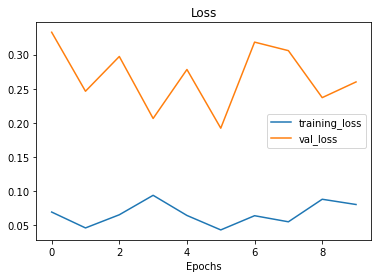

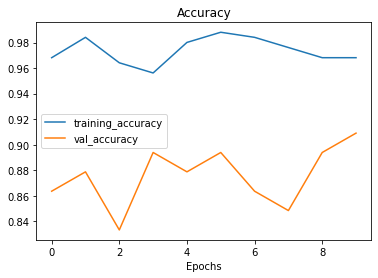

In [79]:
# Plot ResNet Model history
plot_loss_curves(resnet_history)

### Model Summary

In [ ]:
# View Model summary
resnet_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 3)                 771       
                                                                 
Total params: 24,090,115
Trainable params: 525,315
Non-trainable params: 23,564,800
_________________________________________________________________


## Creating and testing EfficientNetB0 Tensorflow Hub Feature Extraction model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create Efficient model
efficientNet_model = create_model(model_url = efficientnet_url,
                                  num_classes = train_data.num_classes )

In [ ]:
# Compile our resnet model
efficientNet_model.compile(loss = "categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"])

In [ ]:
# Fit the model 
efficientNet_history = efficientNet_model.fit(train_data_augmented,
                       epochs = 10,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data_rgb,
                       validation_steps = len(test_data_rgb),
                       callbacks= [create_tensorboard_callback(dir_name = "tensorflow_hub",experiment_name="EffiencientNetB0")])

Saving TensorBoard log files to tensorflow_hub/EffiencientNetB0/20220820-210138
Epoch 1/10
8/8 [==============================] - 23s 2s/step - loss: 0.8702 - accuracy: 0.5697 - val_loss: 0.5593 - val_accuracy: 0.6667
Epoch 2/10
8/8 [==============================] - 13s 2s/step - loss: 0.4289 - accuracy: 0.8606 - val_loss: 0.3623 - val_accuracy: 0.8485
Epoch 3/10
8/8 [==============================] - 13s 2s/step - loss: 0.3282 - accuracy: 0.8765 - val_loss: 0.2803 - val_accuracy: 0.8788
Epoch 4/10
8/8 [==============================] - 14s 2s/step - loss: 0.2975 - accuracy: 0.9124 - val_loss: 0.2260 - val_accuracy: 0.9091
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 0.2193 - accuracy: 0.9084 - val_loss: 0.2711 - val_accuracy: 0.8636
Epoch 6/10
8/8 [==============================] - 13s 2s/step - loss: 0.2460 - accuracy: 0.9004 - val_loss: 0.1858 - val_accuracy: 0.9091
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 0.1816 - accuracy: 0.9

## Save the check point (optional)

That result is good. We can save for retraining over that.

In [ ]:
# Save the model
efficientNet_model.save("efficient_model/efficientNet_model_saveModel_format")

### Download Model

In [ ]:
# Zip the model
!zip -r /efficient_model/efficientNet_model_saveModel_format.zip /efficient_model/efficientNet_model_saveModel_format

In [ ]:
# Download the model
from google.colab import files
files.download("/content/efficient_model_v2/efficientNet_model_saveModel_format.zip")

## Plot EffiencientNetB0 loss and accuracy

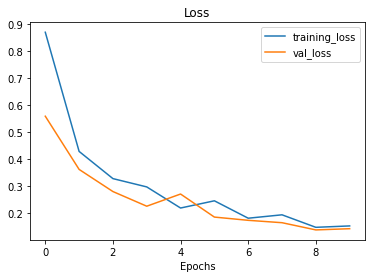

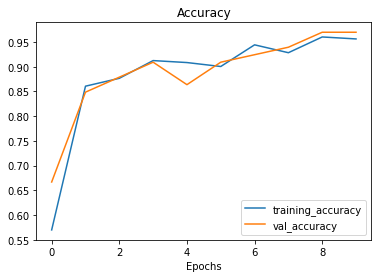

In [ ]:
# Plot EffientNet Model History
plot_loss_curves(efficientNet_history)

### Model Summary

In [ ]:
# Summary model
efficientNet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 dense_19 (Dense)            (None, 256)               327936    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 3)                 771       
                                                                 
Total params: 4,378,271
Trainable params: 328,707
Non-trainable params: 4,049,564
_________________________________________________________________


## Import EfficientNet and Train more

In [29]:
# Unzip the model if you upload later
!unzip /content/efficient_model.zip

Archive:  /content/efficient_model.zip
   creating: content/efficient_model/
   creating: content/efficient_model/efficientNet_model_saveModel_format/
   creating: content/efficient_model/efficientNet_model_saveModel_format/assets/
   creating: content/efficient_model/efficientNet_model_saveModel_format/variables/
  inflating: content/efficient_model/efficientNet_model_saveModel_format/variables/variables.data-00000-of-00001  
  inflating: content/efficient_model/efficientNet_model_saveModel_format/variables/variables.index  
  inflating: content/efficient_model/efficientNet_model_saveModel_format/keras_metadata.pb  
  inflating: content/efficient_model/efficientNet_model_saveModel_format/saved_model.pb  


In [40]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# upload model
efficientNet_model = tf.keras.models.load_model('/content/content/efficient_model/efficientNet_model_saveModel_format')

In [41]:
# Compile our resnet model
efficientNet_model.compile(loss = "categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"])

In [44]:
# Fit the model 
efficientNet_history = efficientNet_model.fit(train_data_augmented,
                       epochs = 5,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data_rgb,
                       validation_steps = len(test_data_rgb),
                       callbacks= [create_tensorboard_callback(dir_name = "tensorflow_hub",experiment_name="EffiencientNetB0")] )

Saving TensorBoard log files to tensorflow_hub/EffiencientNetB0/20220823-143821
Epoch 1/5
8/8 [==============================] - 15s 2s/step - loss: 0.0973 - accuracy: 0.9761 - val_loss: 0.0539 - val_accuracy: 0.9848
Epoch 2/5
8/8 [==============================] - 13s 2s/step - loss: 0.0582 - accuracy: 0.9801 - val_loss: 0.0799 - val_accuracy: 0.9848
Epoch 3/5
8/8 [==============================] - 14s 2s/step - loss: 0.0509 - accuracy: 0.9880 - val_loss: 0.0557 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 13s 2s/step - loss: 0.0651 - accuracy: 0.9801 - val_loss: 0.0919 - val_accuracy: 0.9697
Epoch 5/5
8/8 [==============================] - 14s 2s/step - loss: 0.0426 - accuracy: 0.9880 - val_loss: 0.0525 - val_accuracy: 1.0000


Model is so good and That examples are persent of 100 true. However, that example is not enough. The model can be challenge with more test data.

## Save the check point (optional)

That result is best. I want to save one more.

In [46]:
# Save the mode
efficientNet_model.save("efficient_model/efficientNet_model_saveModel_format")

### Download Model

In [ ]:
# Zip for download
!zip -r /content/efficient_model/efficientNet_model_saveModel_format.zip /content/efficient_model/efficientNet_model_saveModel_format

In [ ]:
# Download the model
from google.colab import files
files.download("/content/efficient_model/efficientNet_model_saveModel_format.zip")

### Get Prediction

In [45]:
# Go over prediction results
y_pred = tf.math.argmax(efficientNet_model.predict(test_data_rgb),axis=1)
y_pred

<tf.Tensor: shape=(66,), dtype=int64, numpy=
array([2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0,
       2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0])>

# Check out Model result by visuliaze

In [12]:
#%% Let's visualize our images
import matplotlib.pyplot as plt
import cv2
import random

def plot_random_image(model,target_dir,target_class,classes,image_size=(224,224),grayscale = False):
    """
    Picks a random image, plot it and labels it with a prediction and truth label

    Parameters
    ----------
    model : Model.
    target_dir : Target folder.
    target_class : Target Class.
    classes : Class Names.
    image_size : image size (tuple)
    grayscale : False is default that is RGB.True is grayscale
    Returns
    -------
    None.

    """

    
    
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    #print(random_image)
    if grayscale == True:
      img = cv2.imread(target_folder+"/"+random_image[0],0)
    else :
      img = cv2.imread(target_folder+"/"+random_image[0])
    
    resized_down = cv2.resize(img, image_size, interpolation= cv2.INTER_LINEAR) /255


    

    resized_down  = tf.expand_dims(resized_down,axis=0) 
    pred_probs = model.predict(resized_down)
    
    pred_label = classes[pred_probs.argmax()]
    true_label = target_class
    

    img_show = img.copy()
    img_show = cv2.resize(img,image_size, interpolation= cv2.INTER_LINEAR)
    # Plot the image
    if grayscale ==True:
       plt.imshow(img_show,cmap ="gray")
    else:
       plt.imshow(img_show)
    plt.title("Prediction vs Truth label")
    
    # Change the color of the titles depending on if the prediction is right or wrong
    
    if pred_label == true_label:
        color = "green"
    else :
        color = "red"
        
    # Add x_label information (prediction/true label)
    plt.xlabel("Pred {} {:2.0f}% (True: {})".format(pred_label,100*tf.reduce_max(pred_probs),true_label),
               color=color) # Set the color to green or red based on right or wrong
    

### Custom Model Visualize

#### Covid Images

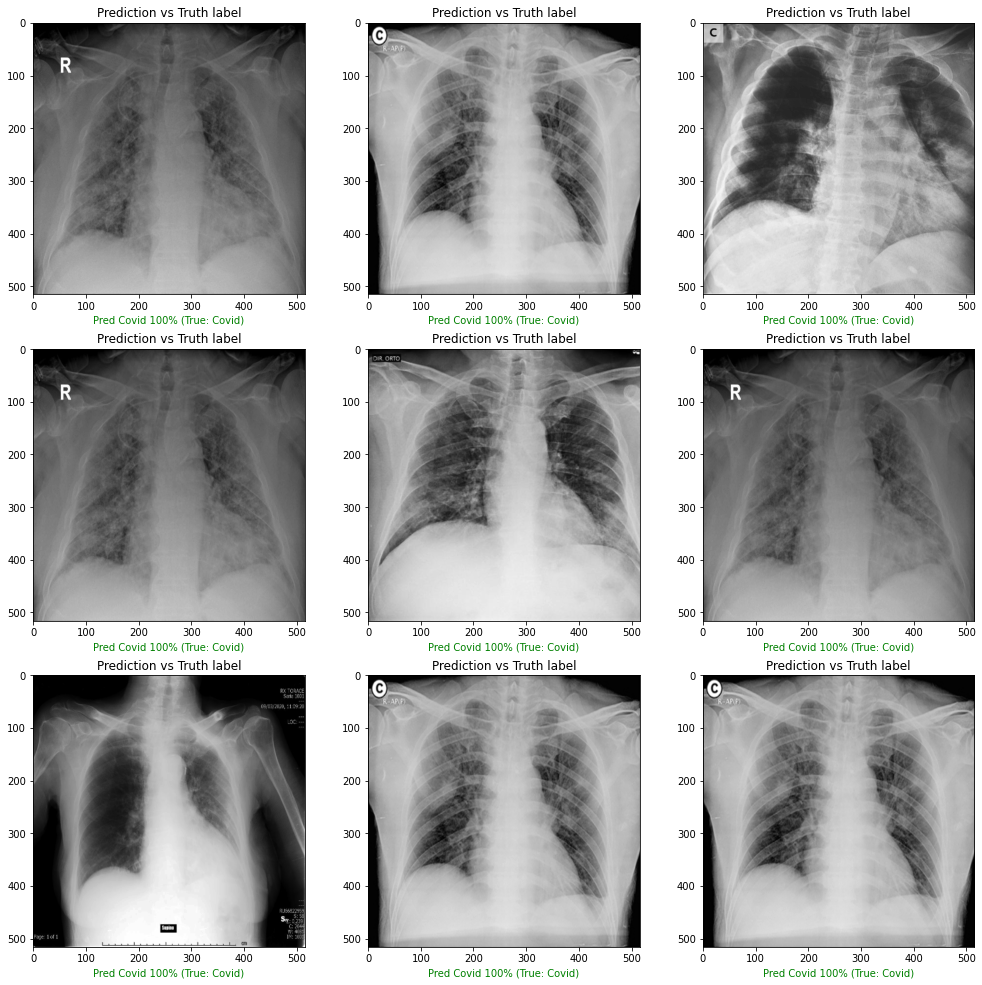

In [ ]:
# Visualize the images and results for Covid
plt.figure(figsize = (17, 17))

for ax in range(9):
    plt.subplot(3, 3, ax + 1)
    plot_random_image(model = model_1,
                  target_dir = "/content/Covid19-dataset/test/",
                  target_class = "Covid",
                  classes =  class_names,
                  image_size = (516,516),
                  grayscale= True)


#### Normal Images

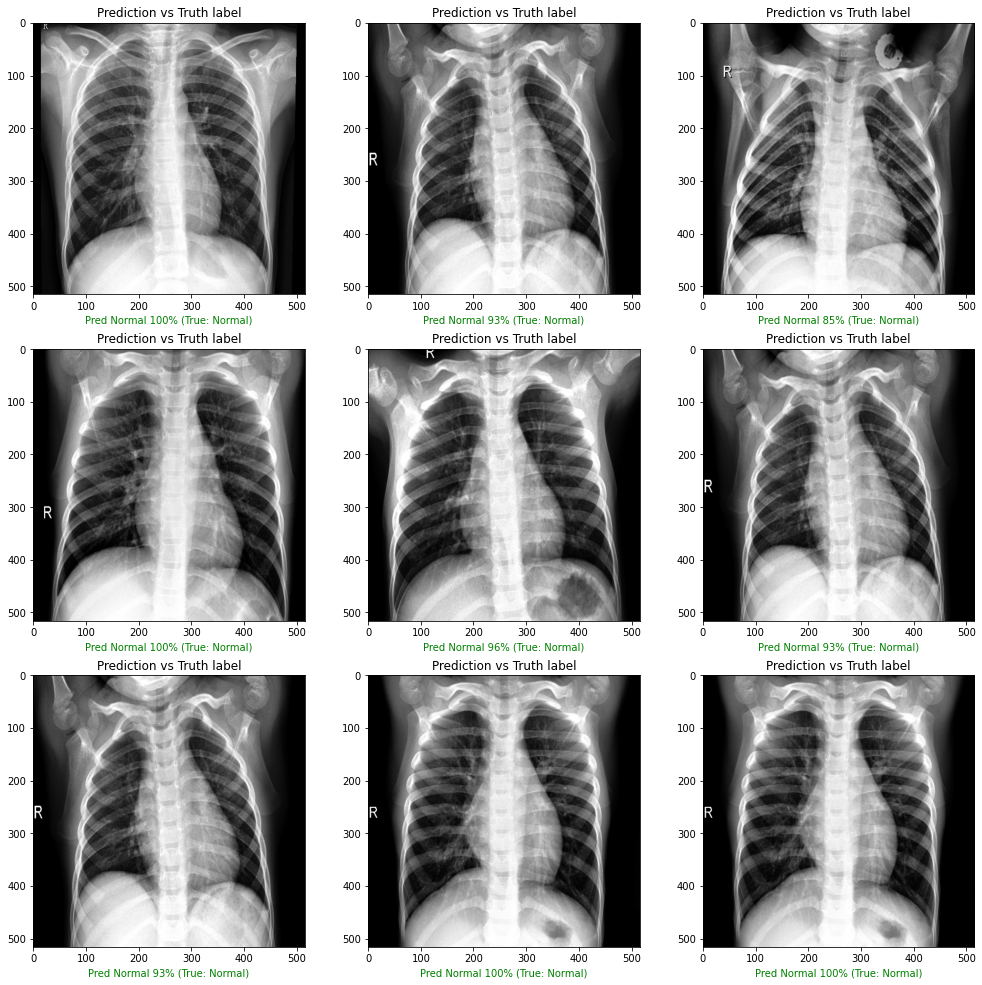

In [ ]:
# Visualize the images and results for Normal
plt.figure(figsize = (17, 17))

for ax in range(9):
    plt.subplot(3, 3, ax + 1)
    plot_random_image(model = model_1,
                  target_dir = "/content/Covid19-dataset/test/",
                  target_class = "Normal",
                  classes =  class_names,
                  image_size = (516,516),
                  grayscale= True)

#### Viral Pneumonia

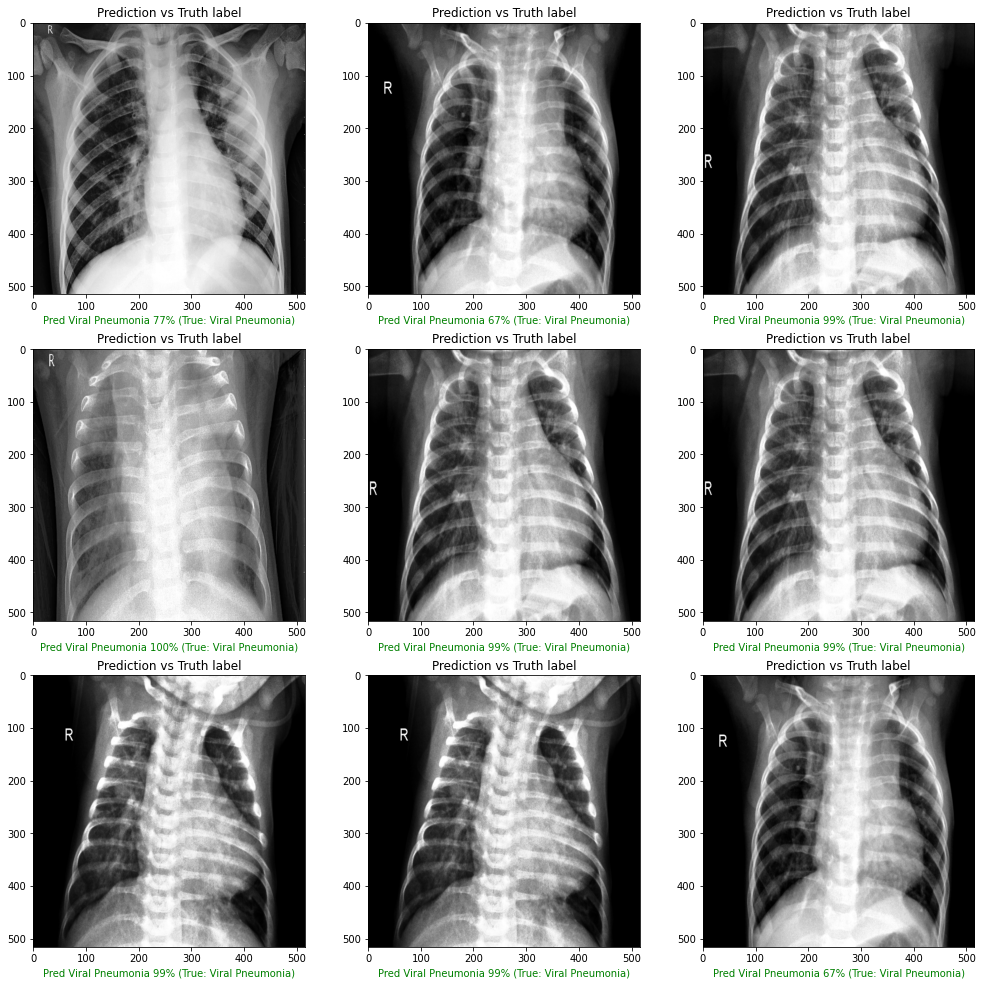

In [ ]:
# Visualize the images and results for Viral Pneumonia
plt.figure(figsize = (17, 17))

for ax in range(9):
    plt.subplot(3, 3, ax + 1)
    plot_random_image(model = model_1,
                  target_dir = "/content/Covid19-dataset/test/",
                  target_class = "Viral Pneumonia",
                  classes =  class_names,
                  image_size = (516,516),
                  grayscale= True)

### Restnet Visualize

#### Covid Images

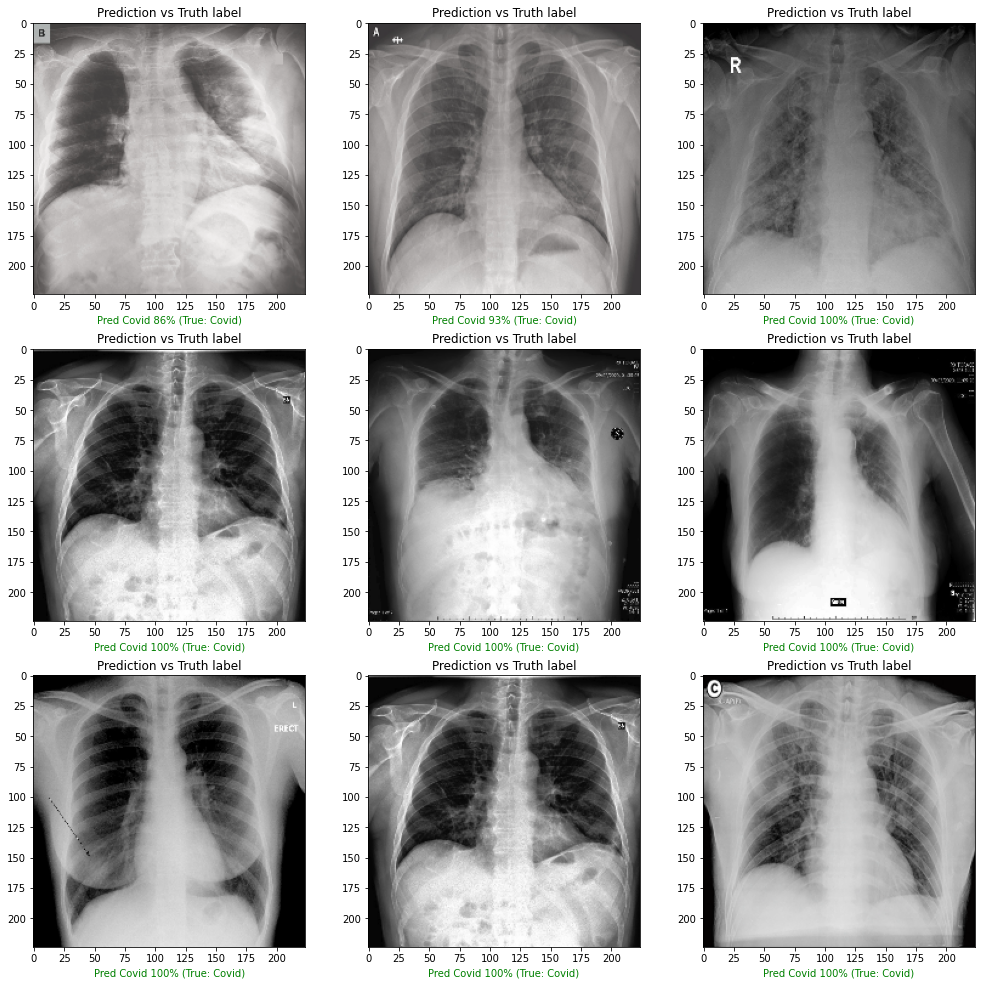

In [89]:
# Visualize the images and results for Covid
plt.figure(figsize = (17, 17))

for ax in range(9):
    plt.subplot(3, 3, ax + 1)
    plot_random_image(model = resnet_model,
                  target_dir = "/content/Covid19-dataset/test/",
                  target_class = "Covid",
                  classes =  class_names)


#### Normal Images

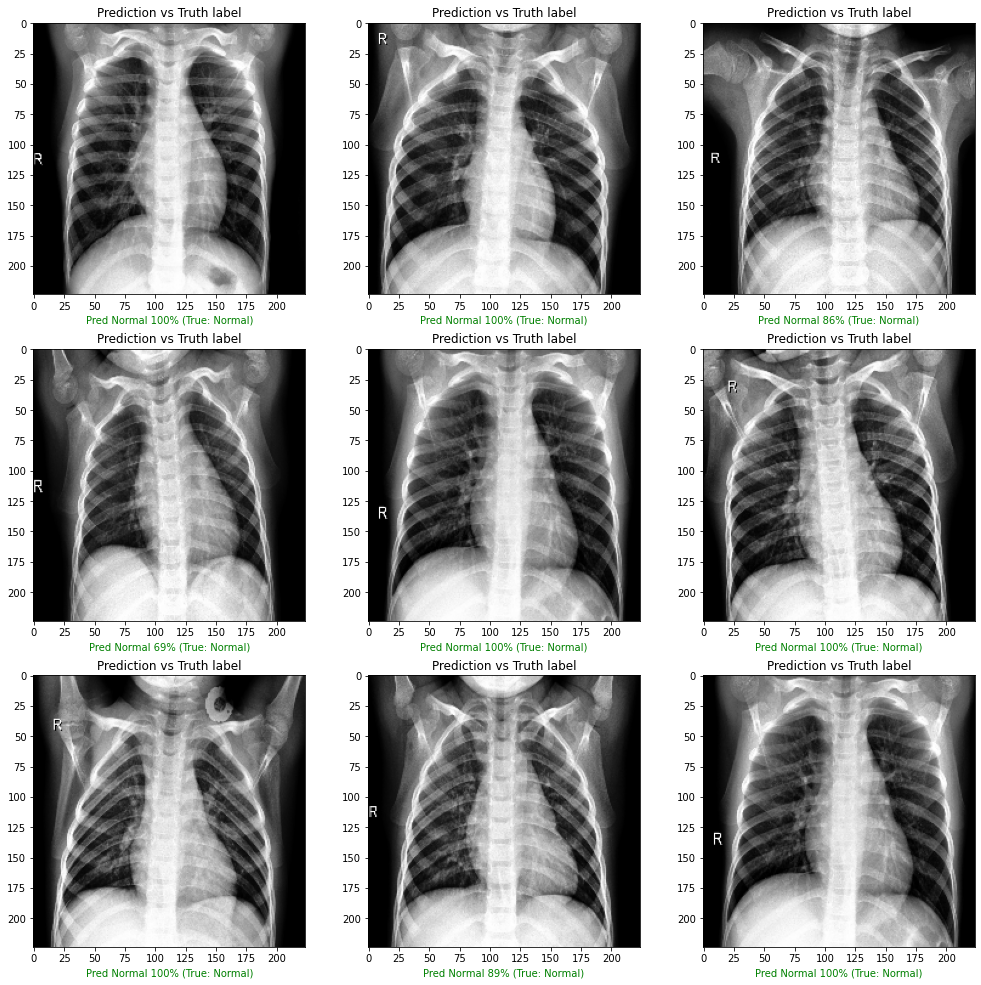

In [90]:
# Visualize the images and results for Normal
plt.figure(figsize = (17, 17))

for ax in range(9):
    plt.subplot(3, 3, ax + 1)
    plot_random_image(model = resnet_model,
                  target_dir = "/content/Covid19-dataset/test/",
                  target_class = "Normal",
                  classes =  class_names)

#### Viral Pneumonia

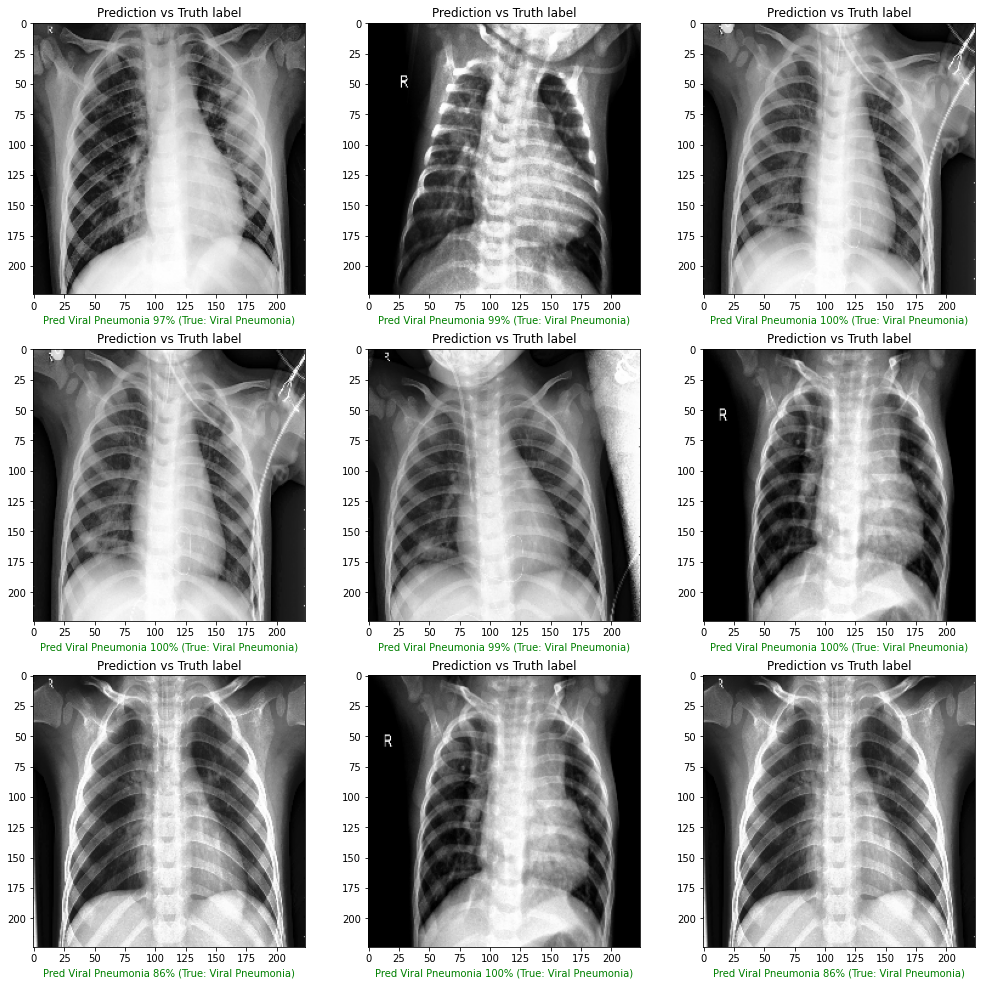

In [93]:
# Visualize the images and results for Viral Pneumonia
plt.figure(figsize = (17, 17))

for ax in range(9):
    plt.subplot(3, 3, ax + 1)
    plot_random_image(model = resnet_model,
                  target_dir = "/content/Covid19-dataset/test/",
                  target_class = "Viral Pneumonia",
                  classes =  class_names)

### EfficientNet Visualize

#### Covid Images

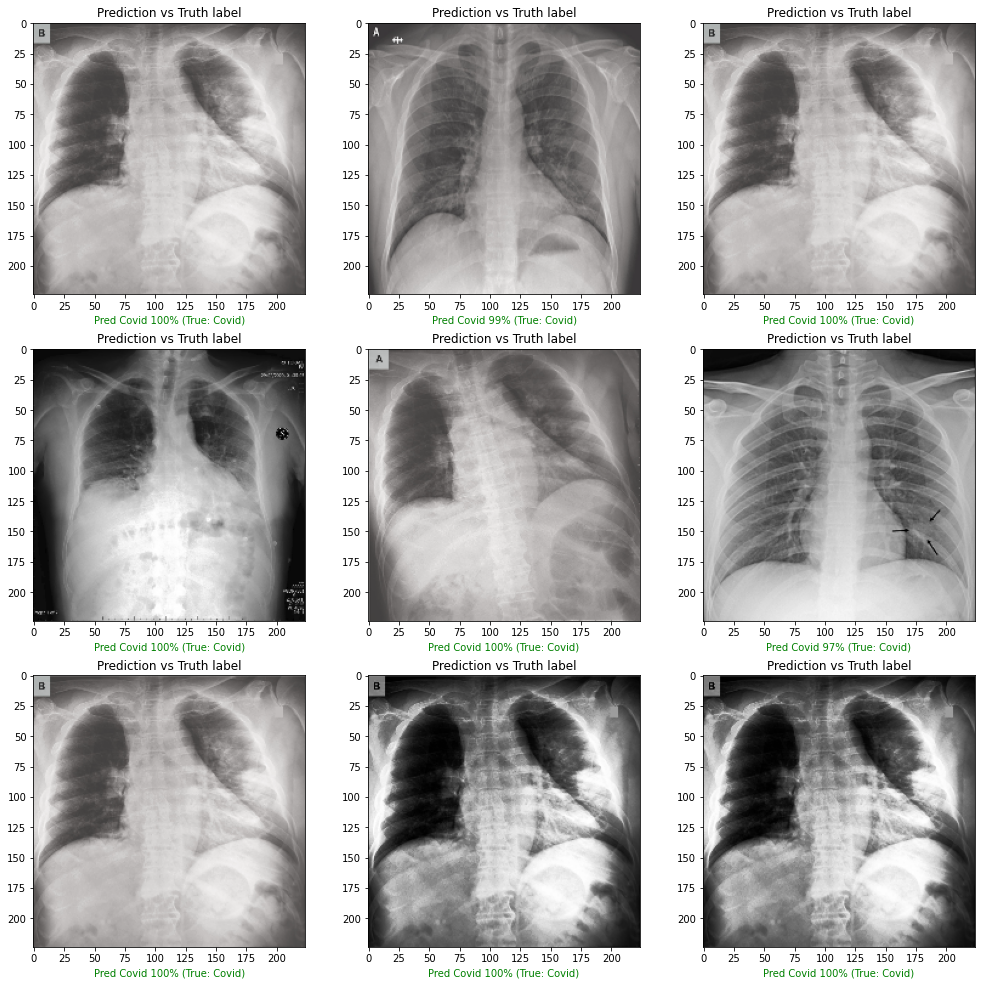

In [ ]:
# Visualize the images and results for Covid
plt.figure(figsize = (17, 17))

for ax in range(9):
    plt.subplot(3, 3, ax + 1)
    plot_random_image(model = efficientNet_model,
                  target_dir = "/content/Covid19-dataset/test/",
                  target_class = "Covid",
                  classes =  class_names)



#### Normal Images

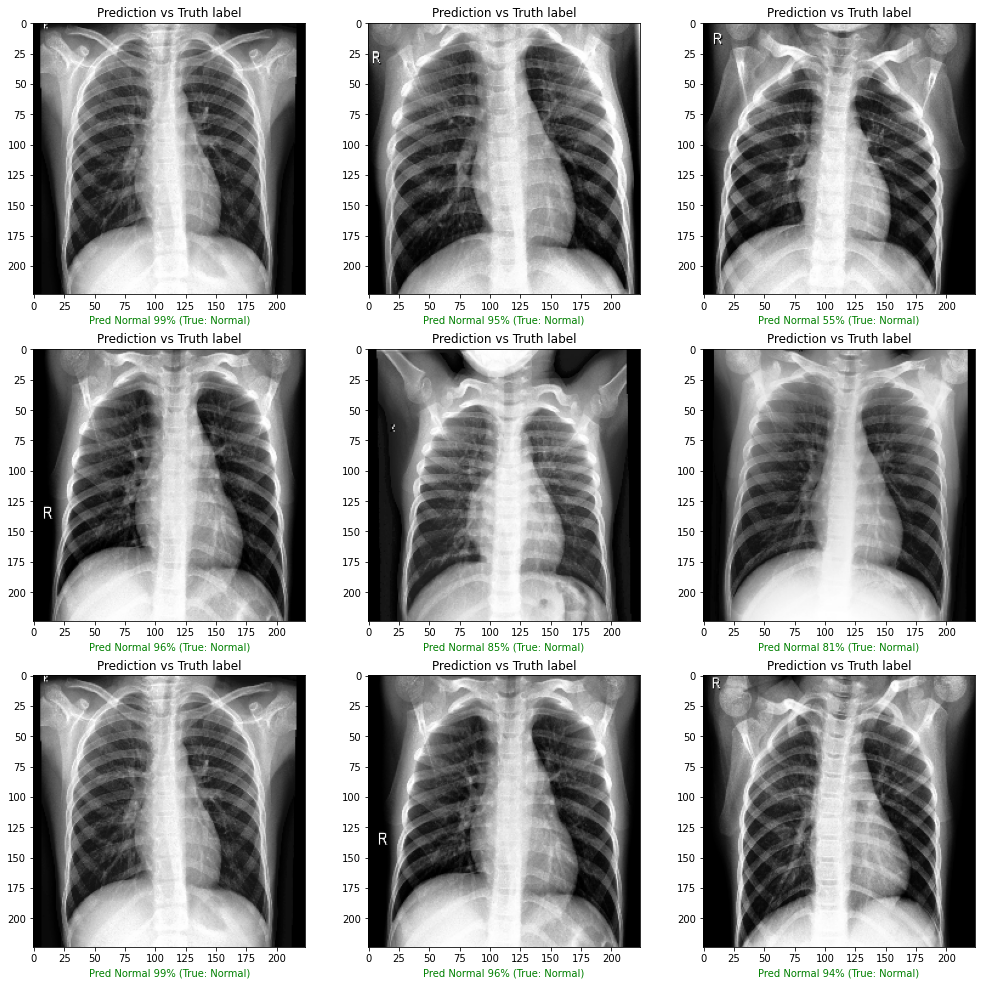

In [ ]:
# Visualize the images and results for Normal
plt.figure(figsize = (17, 17))

for ax in range(9):
    plt.subplot(3, 3, ax + 1)
    plot_random_image(model = efficientNet_model,
                  target_dir = "/content/Covid19-dataset/test/",
                  target_class = "Normal",
                  classes =  class_names)

#### Viral Pneumonia

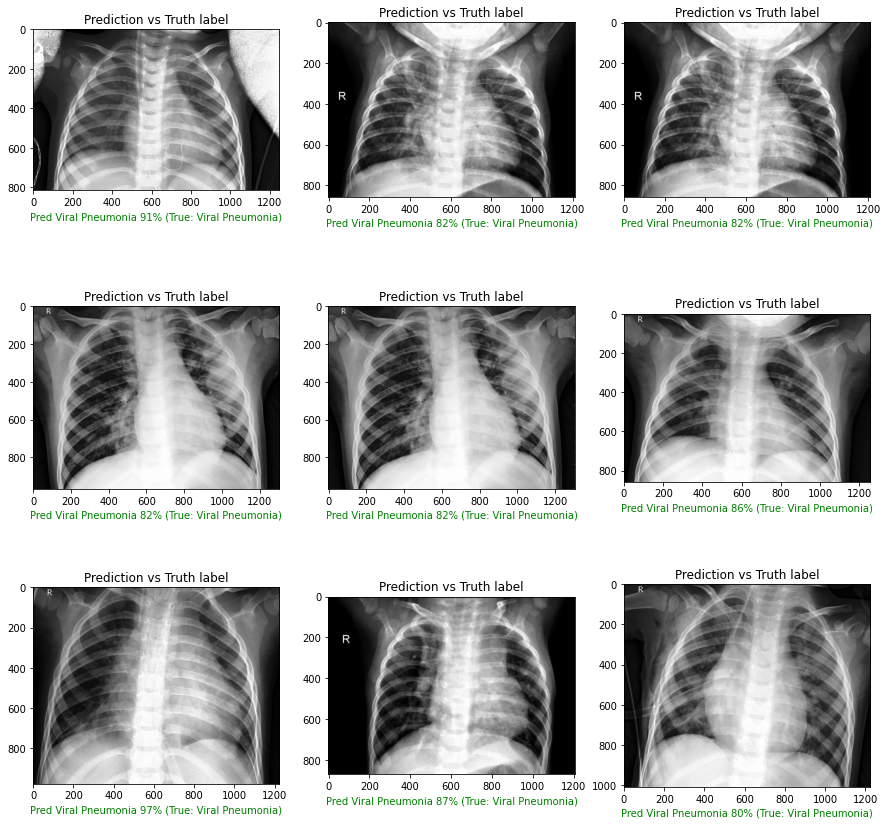

In [ ]:
# Visualize the images and results for Viral Pneumonia
plt.figure(figsize = (15, 15))

for ax in range(9):
    plt.subplot(3, 3, ax + 1)
    plot_random_image(model = efficientNet_model,
                  target_dir = "/content/Covid19-dataset/test/",
                  target_class = "Viral Pneumonia",
                  classes =  class_names)

# Comparing transfer learning models  results using TensorBoard

In [ ]:
# upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB* vs ResNet50V2" \
  --description "Comparing two different TF Hub feature extractinon model architectures using 10% of the training data" \
  --one_shot

Our TensorBoard experiments are uploaded publically here:
Before trained model: https://tensorboard.dev/experiment/EJwGpP9QTpydzhB3gTl6HA/

Last trains results :https://tensorboard.dev/experiment/nyYmpTkxQY2Q6uWJlPCQ9Q/

#Confusion Matrix for each Deep Learning Model

## Custom Confusion Matrix

In [101]:
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def make_confusion_matrix(y_true,y_pred,classes = None,figsize=(10,10),text_size=15):
   
    
    # Create the confusion matrix
    cm = confusion_matrix(y_true,y_pred)
    cm_norm = cm.astype("float")/ cm.sum(axis=1)[:,np.newaxis] # normalization
    n_classes = cm.shape[0]
    
  
    
    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)
    
    
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(title= " Confusion Matrix",
           xlabel= "Predicted Label",
           ylabel = "True Label",
           xticks = np.arange(n_classes),
           yticks= np.arange(n_classes),
           xticklabels = labels,
           yticklabels= labels)
    
    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    
    # Plot text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                 horizontalalignment="center",
                 color = "white" if cm[i,j] > threshold else "black",
                 size = text_size)

### Custom Model Results

In [22]:
# Get image with out shaffle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMG_SIZE =(516,516)
# Rescale
train_datagen_sf = ImageDataGenerator(rescale=1/255.)
test_datagen_sf = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_sf = train_datagen_sf.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               color_mode='grayscale',
                                               shuffle=False,
                                               class_mode="categorical")

test_data_sf = test_datagen_sf.flow_from_directory(test_dir,
                                             target_size =IMG_SIZE,
                                             batch_size = 32,
                                             color_mode='grayscale',
                                             shuffle=False,
                                             class_mode = "categorical")

len(test_data_sf),test_data_sf,len(train_data_sf)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


(3, <keras.preprocessing.image.DirectoryIterator at 0x7f7d30097490>, 8)

In [27]:
# Pred and classification Report
Y_pred = model_1.predict(test_data_sf, 66 // 32+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = test_data_sf.class_indices.keys()
print(classification_report(test_data_sf.classes, y_pred, target_names=target_names))

Classification Report
                 precision    recall  f1-score   support

          Covid       1.00      1.00      1.00        26
         Normal       0.90      0.95      0.93        20
Viral Pneumonia       0.95      0.90      0.92        20

       accuracy                           0.95        66
      macro avg       0.95      0.95      0.95        66
   weighted avg       0.96      0.95      0.95        66



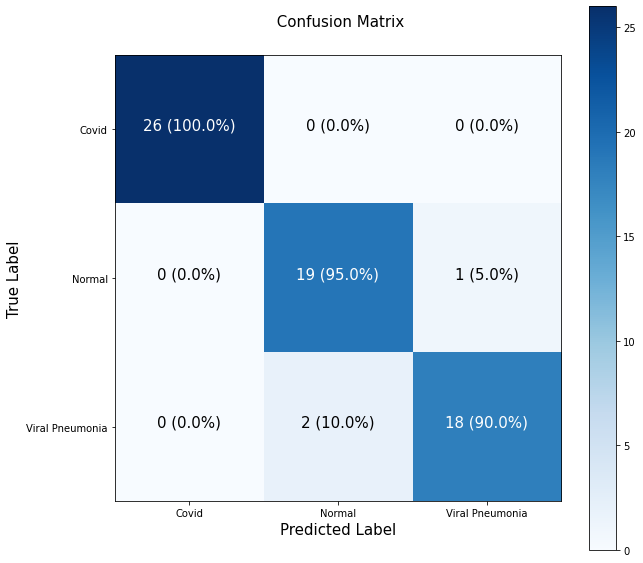

In [28]:
# Plot confusion matrix
make_confusion_matrix(test_data_sf.classes,y_pred,classes = target_names,figsize=(10,10),text_size=15)

## Resnet Results

In [95]:
# Get image with out shaffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r"/content/Covid19-dataset/train/"
IMG_SIZE =(224,224)
# Rescale
train_datagen_augmented_sf = ImageDataGenerator(rescale=1/255.,
                                   rotation_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip =True)

test_datagen_rgb_sf = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_augmented_sf = train_datagen_augmented_sf.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               seed =42,
                                               batch_size=32,
                                               shuffle=False,
                                               class_mode="categorical")


test_data_rgb_sf = test_datagen_rgb_sf.flow_from_directory(test_dir,
                                             target_size =IMG_SIZE,
                                             batch_size = 32,
                                             shuffle=False,
                                             class_mode = "categorical")

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [96]:
# Pred and classification Report
Y_pred = resnet_model.predict(test_data_rgb_sf, 66 // 32+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = test_data_rgb_sf.class_indices.keys()
print(classification_report(test_data_rgb_sf.classes, y_pred, target_names=target_names))

Classification Report
                 precision    recall  f1-score   support

          Covid       1.00      0.88      0.94        26
         Normal       0.87      1.00      0.93        20
Viral Pneumonia       0.95      0.95      0.95        20

       accuracy                           0.94        66
      macro avg       0.94      0.94      0.94        66
   weighted avg       0.95      0.94      0.94        66



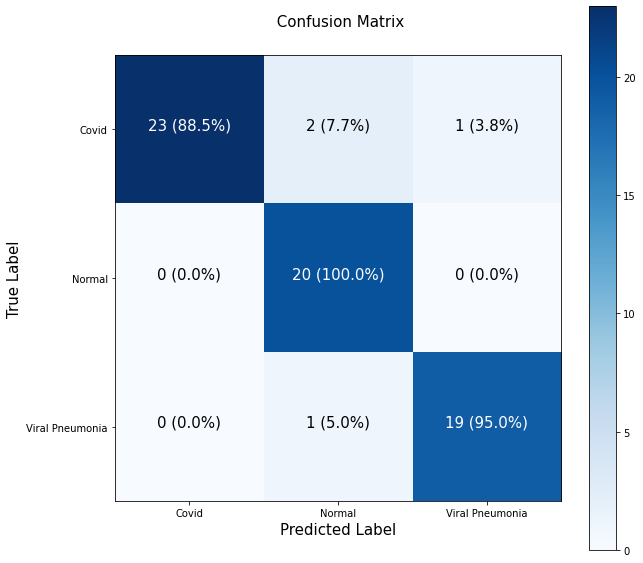

In [97]:
# Plot confusion matrix
make_confusion_matrix(test_data_rgb_sf.classes,y_pred,classes = target_names,figsize=(10,10),text_size=15)

## EfficientNet Results

In [ ]:
# Get image with out shaffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r"/content/Covid19-dataset/train/"
IMG_SIZE =(224,224)
# Rescale
train_datagen_augmented_sf = ImageDataGenerator(rescale=1/255.,
                                   rotation_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip =True)

test_datagen_rgb_sf = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_augmented_sf = train_datagen_augmented_sf.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               seed =42,
                                               batch_size=32,
                                               shuffle=False,
                                               class_mode="categorical")


test_data_rgb_sf = test_datagen_rgb_sf.flow_from_directory(test_dir,
                                             target_size =IMG_SIZE,
                                             batch_size = 32,
                                             shuffle=False,
                                             class_mode = "categorical")

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
# Pred and classification Report
Y_pred = efficientNet_model.predict(test_data_rgb_sf, 66 // 32+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = test_data_rgb_sf.class_indices.keys()
print(classification_report(test_data_rgb_sf.classes, y_pred, target_names=target_names))

Classification Report
                 precision    recall  f1-score   support

          Covid       1.00      1.00      1.00        26
         Normal       1.00      0.95      0.97        20
Viral Pneumonia       0.95      1.00      0.98        20

       accuracy                           0.98        66
      macro avg       0.98      0.98      0.98        66
   weighted avg       0.99      0.98      0.98        66



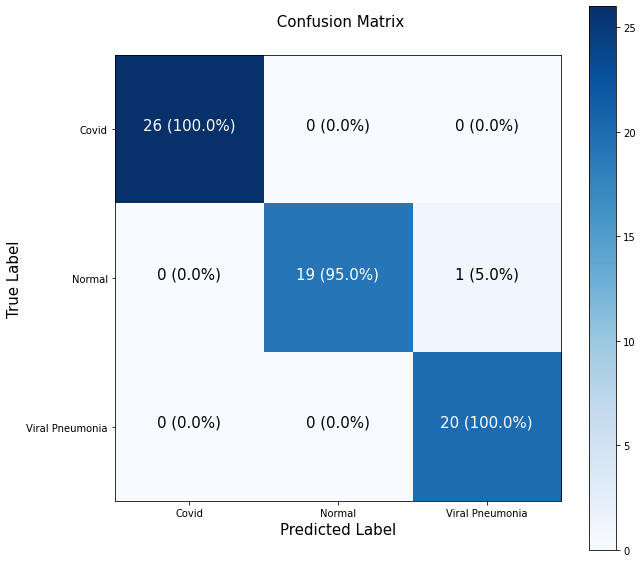

In [ ]:
# Plot confusion matrix
make_confusion_matrix(test_data_rgb_sf.classes,y_pred,classes = target_names,figsize=(10,10),text_size=15)

# Machine Learning 

This we'll improve Machine Learning Models

## Import libraries

In [168]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap



from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern, RationalQuadratic, WhiteKernel

from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


import warnings
warnings.filterwarnings("ignore")

## Custom Preprocess Function

The Function get image from folder.After that it can do what you want to preprocess 

In [241]:
import os
import glob
import cv2
from typing import Tuple
import numpy as np
from sklearn import utils

def prepare_images_and_labels(path : str, image_shape : Tuple[int,int] =None ,scale : list = [] ,grayscale : bool =False, shuffle : bool =False,dataset_type : str = "Xy",flatten : bool = False):

    """
      Import image from directory. After that preprocess the images what you give options

      Parameters
      ----------
      path : Folder directory.That path must be top folder path before split images into folder

      image_shape : Default is "None". If you give spesific shape for images. It will be reshape

      scale : Default is "[]"(empty list). If you want to scale you must write to number into list

      grayscale : Default is "False". If you want to grayscale image set "True".

      shuffle : Default is "False". If you want to shuffle dataset set "True".

      dataset_type : Default is "Xy". If you prepare before train test or train test validation
                     set "all_split" or if you want only train test split you must set "only_train_test"

      flatten : Default is "False". If you want to flat to images when imread images set "True"

      Returns
      ---------
      
      dataset_type => Xy
      ---------
      X : list or numoy array
      y : list or numpy array

      return X,y
      

      dataset_type => split_like_folder
      ---------
      X_train : list or numoy array
      X_test  : list or numoy array
      y_train : list or numoy array
      y_test  : list or numoy array

      return X_train,X_test,y_train,y_test

      Example path
      -----------
      path = "/example/example/**/**/*.jpeg"


      Examples folder types
      --------------------

          Xy :  ---- dataset path
                      ----- X : that will be training
                              ------ class 1
                              ------ class 2
                      ----- y : target
                              ------ class 1
                              ------ class 2

          only_train_test: ---- dataset path
                                  ----- train
                                        ------ class 1
                                        ------ class 2
                                  ----- test
                                        ------ class 1
                                        ------ class 2

          all_split: ----  dataset path
                            ----- train
                                  ------ class 1
                                  ------ class 2
                            ----- test
                                  ------ class 1
                                  ------ class 2
                            ----- validation
                                  ------ class 1
                                  ------ class 2
                                                
      Note: "all_split" or  only_train_test folders names must be same as shown
    """

    try:
        if dataset_type == "Xy": # Only split  X and  y

          X = []
          y = []

          for filename in glob.glob(path): 
            
            img = cv2.imread(filename)

            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            if grayscale == True:
                img =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

            if image_shape is not None: # check out image shape
              img = cv2.resize(img,image_shape)
              
            if scale:
              img = img*scale[0]
            
            path_split = filename.split("/") # Split directories 

            if flatten == True: # Flat if flatten is True
                img = img.flatten()

            X.append(img)
            y.append(str(path_split[-2]))
            
          X = np.array(X)
          y = np.array(y)
          if shuffle == True:# Shuffle dataset if you shuffle set True 
                X_train,y_train = utils.shuffle(X_train, y_train)
                X_test,y_test = utils.shuffle(X_test, y_test)
                X_val,y_val = utils.shuffle(X_val, y_val)
          return X,y
        elif dataset_type == "all_split": # Split train test and validation

            X_train = []
            X_test = []
            y_train = []
            y_test = []
            X_val = []
            y_val = []
            
            for filename in glob.glob(path): 
              
              img = cv2.imread(filename)

              img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

              if grayscale == True:
                img =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
              if image_shape is not None: # Check out image shape
                img = cv2.resize(img,image_shape)
                
              if scale:
                 img = img*scale[0]
              
              path_split = filename.split("/") # Split directories 

              if flatten == True: # Flat if flatten is True
                  img = img.flatten()

              if path_split[-3] == "train":

                  X_train.append(img)
                  y_train.append(str(path_split[-2]))

              elif path_split[-3] == "test":

                  X_test.append(img)
                  y_test.append(str(path_split[-2]))

              elif path_split[-3] == "validation": 
                  
                  X_val.append(img)
                  y_val.append(str(path_split[-2]))

            X_train = np.array(X_train)
            y_train = np.array(y_train)
            X_test = np.array(X_test)
            y_test = np.array(y_test)
            X_val =  np.array(X_val)
            y_val = np.array(y_val)

            if shuffle == True:# Shuffle dataset if you shuffle set True 
                X_train,y_train = utils.shuffle(X_train, y_train)
                X_test,y_test = utils.shuffle(X_test, y_test)
                X_val,y_val = utils.shuffle(X_val, y_val)

            return X_train,y_train, X_test,y_test,X_val,y_val
        elif dataset_type == "only_train_test":  #  Only split train and test set

            X_train = []
            X_test = []
            y_train = []
            y_test = []
            
            
            for filename in glob.glob(path): 
              
              img = cv2.imread(filename)

              img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

              if grayscale == True:
                img =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

              if image_shape is not None: # check out image shape
                img = cv2.resize(img,image_shape)
                
              if scale:
                 img = img*scale[0]
              
              path_split = filename.split("/") # Split directories 
              
              if flatten == True: # Flat if flatten is True
                 img = img.flatten()
                
              if path_split[-3] == "train":

                 X_train.append(img)
                 y_train.append(str(path_split[-2]))

              elif path_split[-3] == "test":

                 X_test.append(img)
                 y_test.append(str(path_split[-2]))
            
          
            X_train = np.array(X_train)
            y_train = np.array(y_train)
            X_test = np.array(X_test)
            y_test = np.array(y_test)
            
            if shuffle == True: # Shuffle dataset if you shuffle set True   
                X_train,y_train = utils.shuffle(X_train, y_train)
                X_test,y_test = utils.shuffle(X_test, y_test)
            
            

            return X_train,y_train, X_test,y_test

    except Exception as e:
           print(e)
   

## Read and Preprocess Images from directory

In [128]:
# Prepare images
path = r"/content/Covid19-dataset/**/**/*.jpeg"
shape = (100,100)
X_train,y_train,X_test,y_test = prepare_images_and_labels(path = path, image_shape = shape,scale = [1/255.] ,grayscale=True ,dataset_type="only_train_test", flatten = True,shuffle=True)
X_train[1].shape

(10000,)

### Check output unique classes and types

In [129]:
# Review out classes
np.unique(y_train)

array(['Covid', 'Normal', 'Viral Pneumonia'], dtype='<U15')

Our target type of data is categorical and measurement level is nominal. So we need to OneHotEncoder

If you dont know which encoder you choose.You can view that page:

https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html

### LabelEncoder

Encode categorical variables to numeric

In [130]:
# Check out Shuffle process
y_train

array(['Covid', 'Normal', 'Covid', 'Covid', 'Normal', 'Covid', 'Normal',
       'Viral Pneumonia', 'Normal', 'Normal', 'Normal', 'Viral Pneumonia',
       'Normal', 'Viral Pneumonia', 'Normal', 'Normal', 'Viral Pneumonia',
       'Viral Pneumonia', 'Normal', 'Covid', 'Covid', 'Viral Pneumonia',
       'Normal', 'Viral Pneumonia', 'Normal', 'Covid', 'Normal', 'Covid',
       'Normal', 'Normal', 'Viral Pneumonia', 'Covid', 'Covid',
       'Viral Pneumonia', 'Covid', 'Normal', 'Viral Pneumonia', 'Normal',
       'Viral Pneumonia', 'Viral Pneumonia', 'Normal', 'Viral Pneumonia',
       'Viral Pneumonia', 'Normal', 'Viral Pneumonia', 'Normal', 'Normal',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Normal',
       'Viral Pneumonia', 'Viral Pneumonia', 'Covid', 'Normal', 'Normal',
       'Normal', 'Normal', 'Viral Pneumonia', 'Covid', 'Viral Pneumonia',
       'Normal', 'Normal', 'Covid', 'Viral Pneumonia', 'Normal', 'Normal',
       'Normal', 'Viral Pneumonia', 'Covid', '

In [131]:
# Encode target
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)

y_test = le.transform(y_test)

In [132]:
# View encode and Shapes
y_train, y_train.shape, X_train.shape

(array([0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2,
        1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1,
        2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 1,
        1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2,
        1, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2,
        1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 2, 2,
        1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0,
        0, 2, 0, 0, 0, 0, 2, 2, 1, 1]), (186,), (186, 10000))

## Prepare Hyperparameter for Machine Learning Classification Models

## Machine Learning Classifiers

In [169]:
# Create Machine Learning Models
gsc =GaussianProcessClassifier(random_state=42)

lr = LogisticRegression(random_state=42)

dt =DecisionTreeClassifier()

rf = RandomForestClassifier(random_state=42)

knn =  KNeighborsClassifier()

svc = SVC(random_state=42)



## Prepare Cross-validation

In [170]:
# Split by using KFold
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)

## Prepare the parameters

We need to parameters for Grid search that way we can find best parameter for our dataset

In [171]:
# Fine Tuning for Machine Learning classifiers's paramater
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]


gaussian_param_grid = [{'kernel' :[1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]}]

lr_param_grid = [{'penalty': ['elasticnet','l1', 'l2',None],
                   'C': param_range_fl,
                   'class_weight':['balanced',None],
                   'solver': ['liblinear','newton-cg','sag','lbfgs','sag']},
                 ]

dt_param_grid = [{'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]}]

rf_param_grid = [{'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]}]

knn_param_grid = [{'n_neighbors': param_range,
                   'weights': ['uniform', 'distance'],
                   'metric': ['euclidean', 'manhattan']}]
svc_param_grid = [{'kernel': ['linear', 'rbf'], 
                    'C': param_range}]




## Prepare GridSearchCV for each model

In [172]:
# Create GridSearchCV for each classifier
verbose =1

n_jobs = -1

gs_grid_search = GridSearchCV(estimator=gsc,
                              param_grid= gaussian_param_grid,
                              scoring="accuracy",
                              cv=cv,
                              verbose=verbose,
                              n_jobs=n_jobs)

lr_grid_search = GridSearchCV(estimator=lr,
                              param_grid=lr_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=verbose,
                              n_jobs=n_jobs)



dt_grid_search = GridSearchCV(estimator=dt,
                              param_grid=dt_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=verbose,
                              n_jobs=n_jobs)


rf_grid_search = GridSearchCV(estimator=rf,
                              param_grid=rf_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=verbose,
                              n_jobs=n_jobs)


knn_grid_search = GridSearchCV(estimator=knn,
                               param_grid=knn_param_grid,
                               scoring='accuracy',
                               cv=cv,
                               verbose=verbose,
                               n_jobs=n_jobs)


svc_grid_search = GridSearchCV(estimator=svc,
                               param_grid=svc_param_grid,
                               scoring='accuracy',
                               cv=cv,
                               verbose=verbose,
                               n_jobs=n_jobs)





## Train the Models

In [175]:
# Fit the models by using GridSearchCv
grids = [gs_grid_search,lr_grid_search,dt_grid_search, rf_grid_search, knn_grid_search, svc_grid_search]

model_name =['Gaussian Process Classifier','Logistic Regression','Decision Trees', 'Random Forest', 'K-Nearest Neighbors','Support Vector Machines']
idx =0
for pipe in grids:
    print("{0}".format(model_name[idx]))
    pipe.fit(X_train,y_train)
    
    print("---"*30)
    idx+=1

Gaussian Process Classifier
Fitting 6 folds for each of 5 candidates, totalling 30 fits
------------------------------------------------------------------------------------------
Logistic Regression
Fitting 6 folds for each of 120 candidates, totalling 720 fits
------------------------------------------------------------------------------------------
Decision Trees
Fitting 6 folds for each of 360 candidates, totalling 2160 fits
------------------------------------------------------------------------------------------
Random Forest
Fitting 6 folds for each of 180 candidates, totalling 1080 fits
------------------------------------------------------------------------------------------
K-Nearest Neighbors
Fitting 6 folds for each of 24 candidates, totalling 144 fits
------------------------------------------------------------------------------------------
Support Vector Machines
Fitting 6 folds for each of 12 candidates, totalling 72 fits
--------------------------------------------------

In [191]:
# Visualize results by using Classification Report
grid_dict ={0: 'Gaussian Process Classifier',
            1: 'Logistic Regression',
            2: 'Decision Tree', 
            3: 'Random Forest',
            4: 'K-Nearest Neighbors', 
            5: 'Support Vector Machines',
            }

for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))
    y_pred= model.predict(X_test)
    print("\n\n")
    print(classification_report(y_test, y_pred, target_names=class_names))
    print("\n\n")
    print("*"*30)
    print("\n\n")

Gaussian Process Classifier Test Accuracy: 0.7884615384615384
Gaussian Process Classifier Best Params: {'kernel': 1**2 * DotProduct(sigma_0=1)}



                 precision    recall  f1-score   support

          Covid       1.00      0.75      0.86        12
         Normal       0.76      0.80      0.78        20
Viral Pneumonia       0.73      0.80      0.76        20

       accuracy                           0.79        52
      macro avg       0.83      0.78      0.80        52
   weighted avg       0.80      0.79      0.79        52




******************************



Logistic Regression Test Accuracy: 0.8653846153846154
Logistic Regression Best Params: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}



                 precision    recall  f1-score   support

          Covid       1.00      0.83      0.91        12
         Normal       0.82      0.90      0.86        20
Viral Pneumonia       0.85      0.85      0.85        20

       accuracy

### Machine Learning Classification Models Results


**Gaussian Process Classifier Test Accuracy:** 0.7884615384615384

**Gaussian Process Classifier Best Params:** {'kernel': 1**2 * DotProduct(sigma_0=1}



                           precision    recall  f1-score   support

                 Covid       1.00      0.75      0.86        12
                Normal       0.76      0.80      0.78        20
       Viral Pneumonia       0.73      0.80      0.76        20

              accuracy                           0.79        52
             macro avg       0.83      0.78      0.80        52
          weighted avg       0.80      0.79      0.79        52




******************************


**Logistic Regression Test Accuracy:** 0.8653846153846154

**Logistic Regression Best Params:** {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}



                            precision  recall   f1-score    support

                   Covid       1.00      0.83      0.91        12
                  Normal       0.82      0.90      0.86        20
         Viral Pneumonia       0.85      0.85      0.85        20

                accuracy                           0.87        52
               macro avg       0.89      0.86      0.87        52
            weighted avg       0.87      0.87      0.87        52




******************************


**Decision Tree Test Accuracy:** 0.5576923076923077

**Decision Tree Best Params:** {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}



                            precision  recall   f1-score    support

                   Covid       0.89      0.67      0.76        12
                  Normal       0.50      0.35      0.41        20
         Viral Pneumonia       0.48      0.70      0.57        20

                accuracy                           0.56        52
               macro avg       0.62      0.57      0.58        52
            weighted avg       0.58      0.56      0.55        52




******************************


**Random Forest Test Accuracy:** 0.7115384615384616

**Random Forest Best Params:** {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}



                           precision   recall   f1-score   support

                  Covid       1.00      0.75      0.86        12
                 Normal       0.71      0.60      0.65        20
        Viral Pneumonia       0.62      0.80      0.70        20

               accuracy                           0.71        52
              macro avg       0.77      0.72      0.73        52
           weighted avg       0.74      0.71      0.71        52




******************************


**K-Nearest Neighbors Test Accuracy:** 0.8269230769230769

**K-Nearest Neighbors Best Params:** {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}



                         precision  recall   f1-score    support

               Covid       1.00      0.83      0.91        12
              Normal       0.93      0.65      0.76        20
     Viral Pneumonia       0.71      1.00      0.83        20

            accuracy                           0.83        52
           macro avg       0.88      0.83      0.84        52
        weighted avg       0.86      0.83      0.82        52




******************************


**Support Vector Machines Test Accuracy:** 0.9038461538461539

**Support Vector Machines Best Params:** {'C': 4, 'kernel': 'rbf'}



                        precision   recall   f1-score    support

               Covid       1.00      0.83      0.91        12
              Normal       0.83      0.95      0.88        20
     Viral Pneumonia       0.95      0.90      0.92        20

            accuracy                           0.90        52
           macro avg       0.92      0.89      0.91        52
        weighted avg       0.91      0.90      0.90        52


### Confusion Matrix For Machine Learning Models

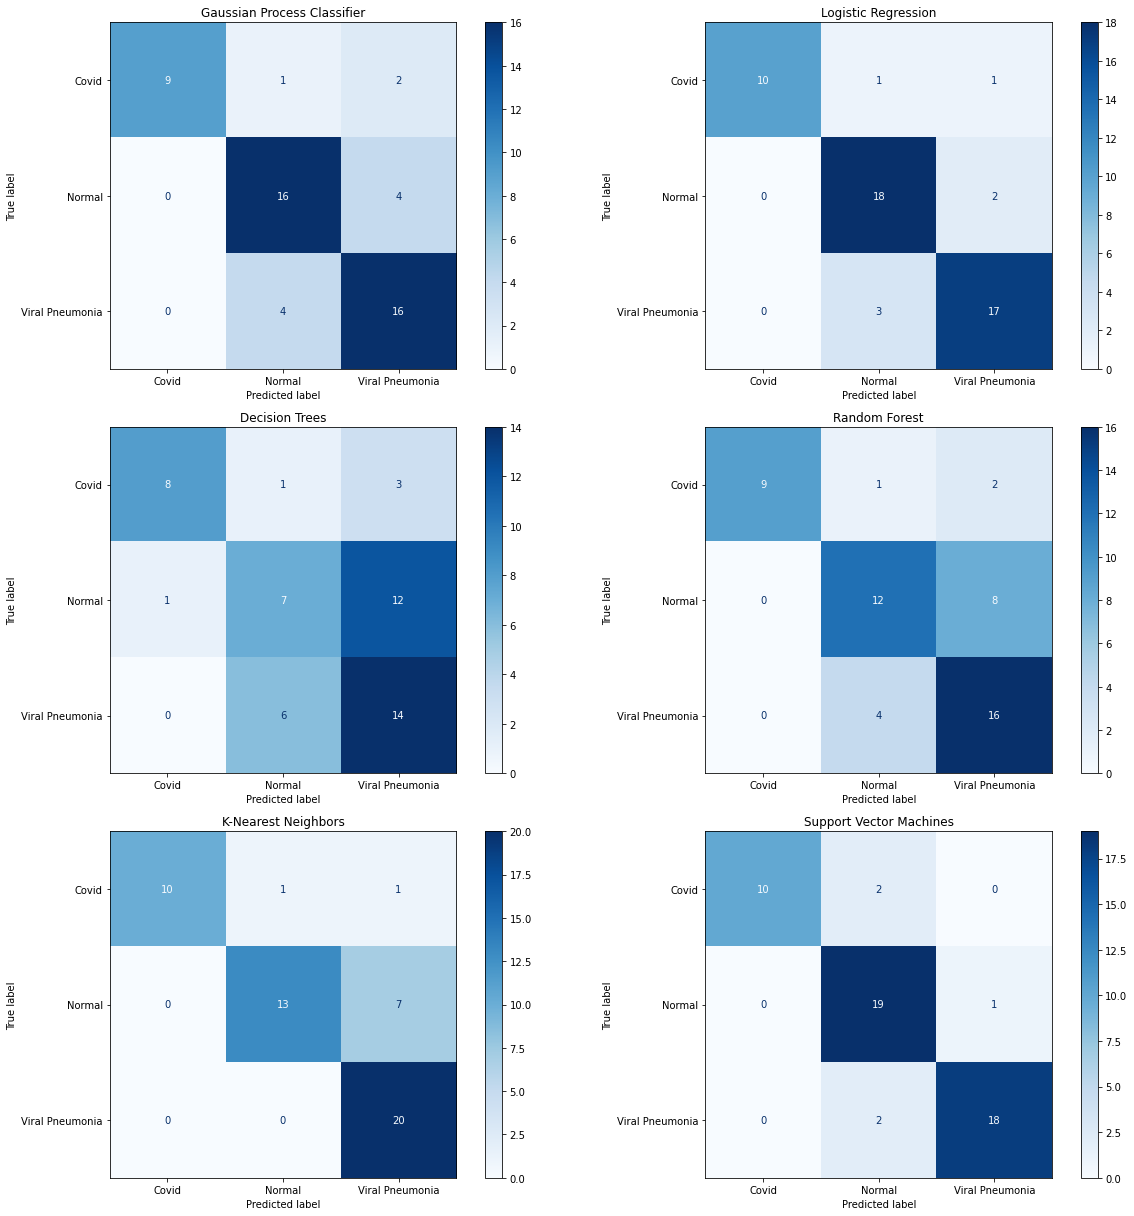

In [240]:
# Visualize Confusion Matrix for each Machine Learning model
from sklearn.metrics  import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(17,17))
i = 0
for cls, ax in zip(grids, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['Covid' ,'Normal', 'Viral Pneumonia'])
    ax.title.set_text(model_name[i])
    i+=1
plt.tight_layout()  
plt.show()